In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\data sets\\wine.csv")
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# MinMaxscaling

In [3]:
df = df[['Wine','Alcohol','Malic.acid']]

In [4]:
df.head()

,Wine,Alcohol,Malic.acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

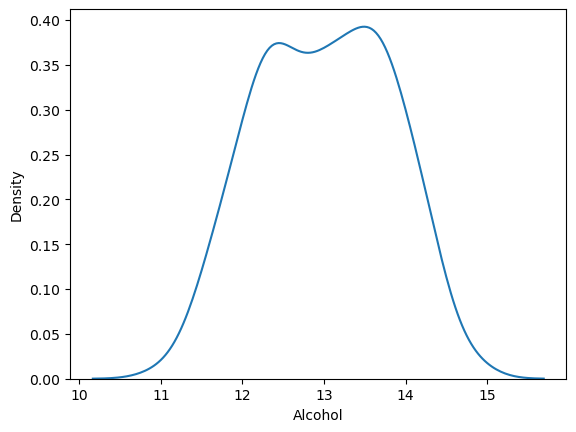

In [5]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic.acid', ylabel='Density'>

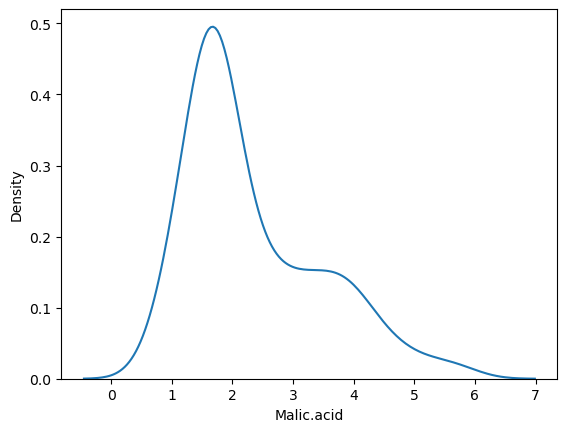

In [6]:
sns.kdeplot(df['Malic.acid'])

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

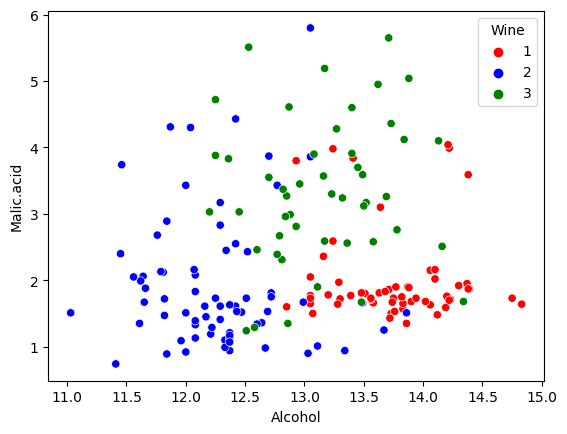

In [7]:
c = {1:'red' ,2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic.acid'],hue =df['Wine'],palette= c)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Malic.acid',axis=1),df['Malic.acid'],
                                                test_size = 0.3, random_state=1)

In [9]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [11]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled , columns =x_test.columns)

In [12]:
np.round(x_train.describe(),1)

,Wine,Alcohol
count,124.0,124.0
mean,2.0,12.9
std,0.8,0.8
min,1.0,11.0
25%,1.0,12.3
50%,2.0,13.0
75%,3.0,13.5
max,3.0,14.8


In [13]:
np.round(x_train_scaled.describe(),1)

,Wine,Alcohol
count,124.0,124.0
mean,0.5,0.5
std,0.4,0.2
min,0.0,0.0
25%,0.0,0.3
50%,0.5,0.5
75%,1.0,0.7
max,1.0,1.0


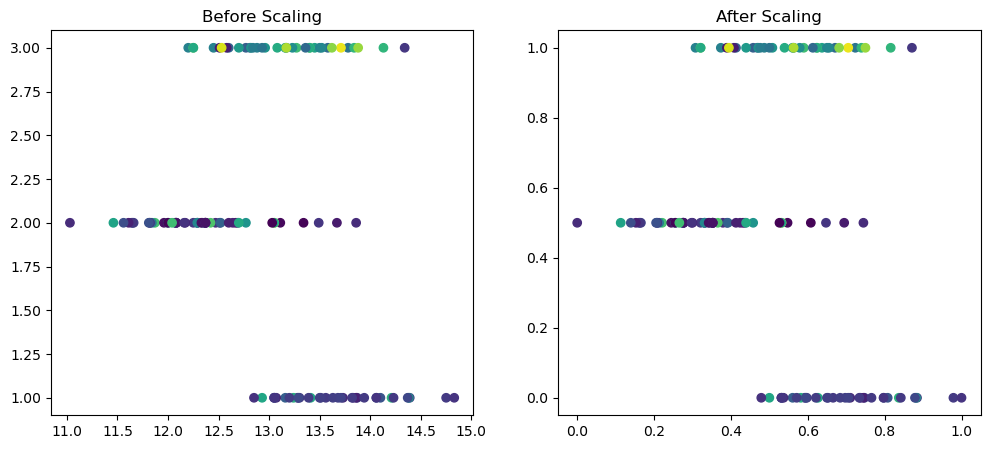

In [14]:
fig , (ax1,ax2) = plt.subplots(ncols =2 , figsize=(12,5))

ax1.scatter(x_train['Alcohol'],x_train['Wine'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Wine'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

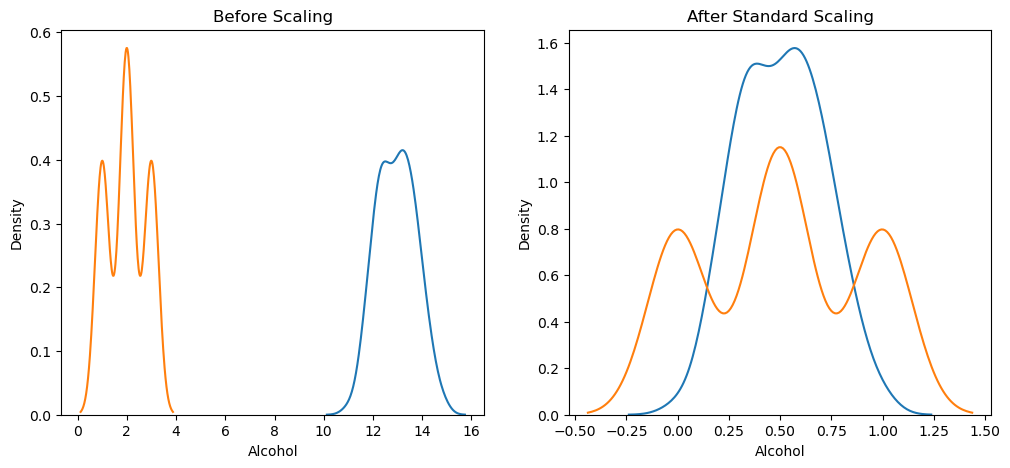

In [15]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize =(12,5))

#Before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Wine'],ax=ax1)

#After scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(x_train_scaled['Alcohol'],ax= ax2)
sns.kdeplot(x_train_scaled['Wine'],ax=ax2)
plt.show()

# Mean scaling

In [16]:
df= pd.DataFrame(
{'numb':[1,2,3,4,5,6,7,8,9,10]})

In [17]:
df

,numb
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [18]:
df_norm = (df-df.mean())/(df.max()-df.min())
# fromula for meanscaling


In [19]:
# gives value between -1 to 1 range
df_norm

,numb
0,-0.500000
1,-0.388889
2,-0.277778
3,-0.166667
4,-0.055556
5,0.055556
6,0.166667
7,0.277778
8,0.388889
9,0.500000


In [20]:
round(df_norm.describe(),1)

,numb
count,10.0
mean,0.0
std,0.3
min,-0.5
25%,-0.2
50%,0.0
75%,0.2
max,0.5


<Axes: title={'center': 'After scaling'}>

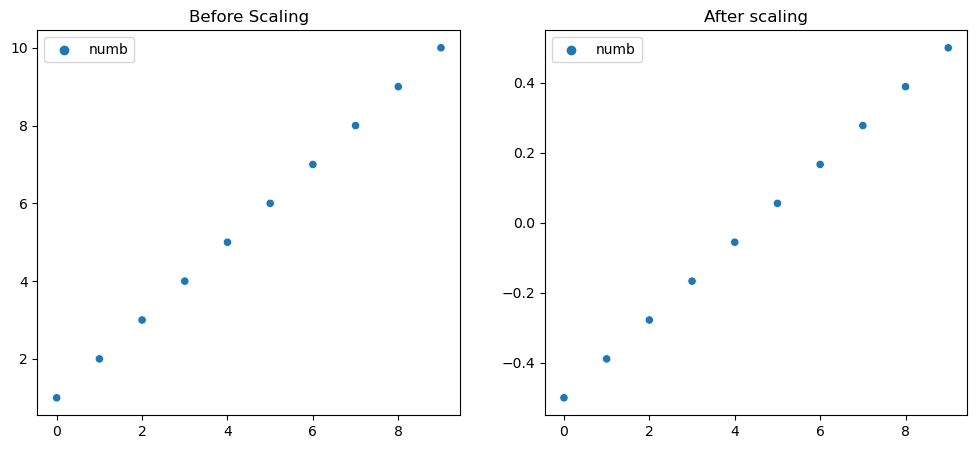

In [21]:
fig, (a1,a2) = plt.subplots(ncols=2 ,figsize =(12,5))

#Befor scaling
a1.set_title("Before Scaling")
sns.scatterplot(df,ax=a1)

#After scaling
a2.set_title("After scaling")
sns.scatterplot(df_norm,ax=a2)

# MaxAbsscaler

In [22]:
df = pd.DataFrame({
    'numb':[1,0,0,2,3,1,0,0,4,0]
})

In [23]:
df

,numb
0,1
1,0
2,0
3,2
4,3
5,1
6,0
7,0
8,4
9,0


In [24]:
from sklearn.preprocessing import MaxAbsScaler
# formula = value /|value.max()|
# Mostly use in sparse dataset(zero value data set)

In [25]:
x = MaxAbsScaler()

In [26]:
scaled =x.fit_transform(df)

In [27]:
pd.DataFrame(scaled,columns = df.columns)

,numb
0,0.25
1,0.00
2,0.00
3,0.50
4,0.75
5,0.25
6,0.00
7,0.00
8,1.00
9,0.00


In [28]:
df.describe()

,numb
count,10.000000
mean,1.100000
std,1.449138
min,0.000000
25%,0.000000
50%,0.500000
75%,1.750000
max,4.000000


# Robust scaling

### It is good for data containg outlier

In [29]:
df = pd.DataFrame(
{
    'Numb':[5,6,30,7,3,8,9,40,9,1]
})

In [30]:
df

,Numb
0,5
1,6
2,30
3,7
4,3
5,8
6,9
7,40
8,9
9,1


In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
rob= RobustScaler()

In [33]:
scaled = rob.fit_transform(df)

In [34]:
scaled = pd.DataFrame(scaled,columns =df.columns)
scaled

,Numb
0,-0.666667
1,-0.400000
2,6.000000
3,-0.133333
4,-1.200000
5,0.133333
6,0.400000
7,8.666667
8,0.400000
9,-1.733333
